In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
key = input("Enter the key: ")
Abases = input("Enter Alice bases: ")
Bbases = input("Enter Bob bases: ")

In [31]:
raw_data_df = pd.read_csv('qkd_with_1s.csv', header=None)

In [32]:
def process(raw_data_df):
    data_df = raw_data_df.iloc[21:, :3]
    data_df.columns = ['Time', 'CH1', 'CH2']
    data_df.reset_index(drop=True, inplace=True)
    return data_df

In [33]:
data_df = process(raw_data_df)
print(data_df.head())
print(data_df.shape)

          Time      CH1      CH2
0  -5.0000e+01  -0.0024  -0.0028
1  -4.9990e+01  -0.0048   -0.002
2  -4.9980e+01  -0.0032  -0.0028
3  -4.9970e+01  -0.0016   0.0172
4  -4.9960e+01  -0.0016    0.018
(10000, 3)


In [34]:
data_np = data_df.to_numpy().astype(float)
difference_np = data_np[:, 1] - data_np[:, 2]
# Concatenate the times
difference_np = np.column_stack((data_np[:, 0], difference_np))

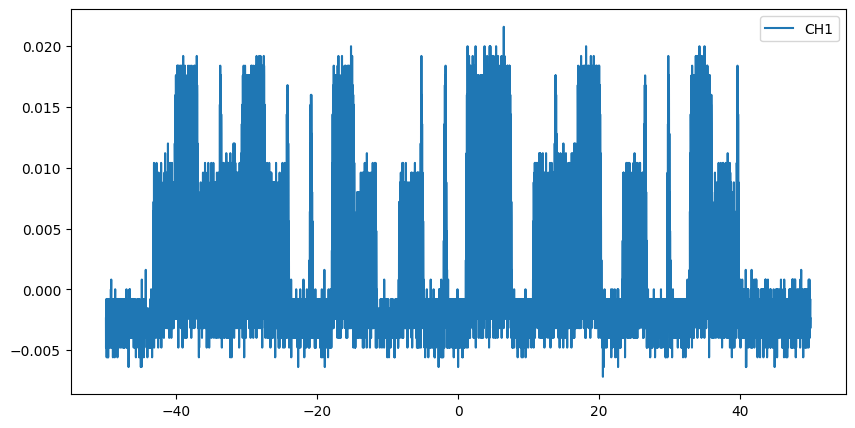

In [35]:
# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(data_np[:, 0], data_np[:, 1], label='CH1')
plt.legend()
plt.show()

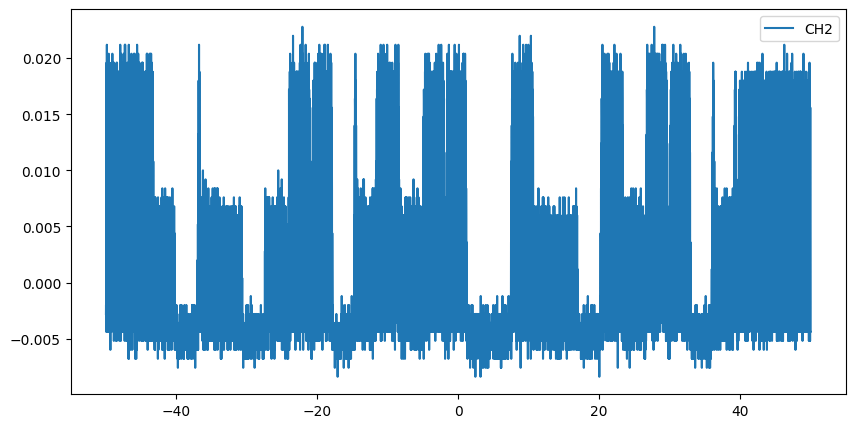

In [36]:
# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(data_np[:, 0], data_np[:, 2], label='CH2')
plt.legend()
plt.show()

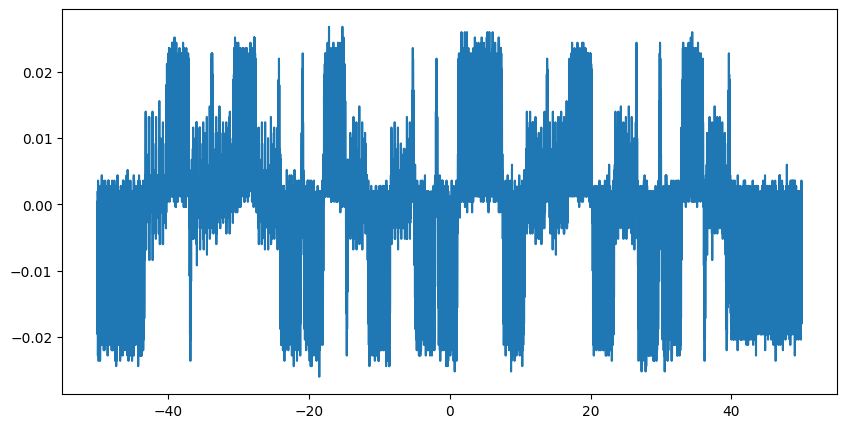

In [37]:
# Plot the difference, make horizontal axis is longer in display
plt.figure(figsize=(10, 5))
plt.plot(difference_np[:, 0], difference_np[:, 1])
plt.show()

In [38]:
def slice_data(data_np, start_time, end_time):
    # Every 2170 milliseconds, get 300 ms of data
    data_np = data_np[(data_np[:, 0] >= start_time) & (data_np[:, 0] <= end_time)]
    result = np.empty((0, 3), float)
    for i in range(230, len(data_np), 317):
        result = np.vstack((result, data_np[i:i+150, :]))
    return result

In [39]:
def find_start_time(data_np):
    for i in range(len(data_np)):
        if abs(data_np[i, 1] - data_np[i+130, 1]) > 0.01 or abs(data_np[i, 2] - data_np[i+130, 2]) > 0.01:
            return data_np[i, 0]
    return -1

In [40]:
def end_time(start_time, key):
    key_length = len(key)
    return start_time + key_length * 3.17

In [41]:
start_time = find_start_time(data_np)
print(start_time)
end_time = end_time(-44, key)
print(end_time)
sliced_data = slice_data(data_np, -44, end_time)

-49.99
32.08


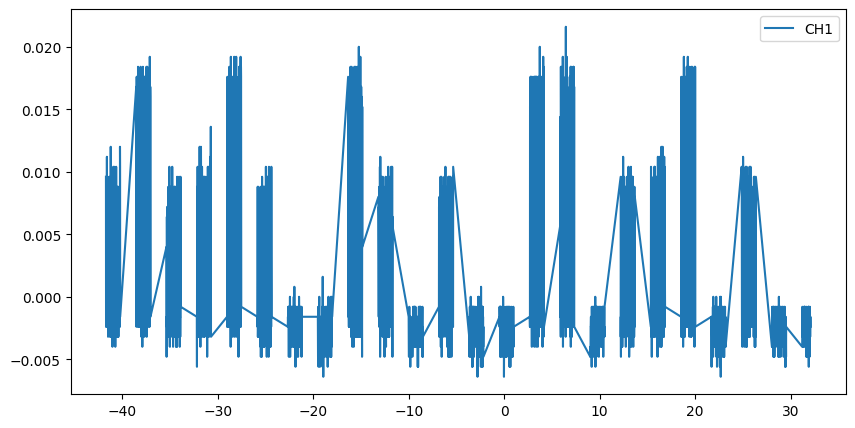

In [42]:
# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(sliced_data[:, 0], sliced_data[:, 1], label='CH1')
plt.legend()
plt.show()

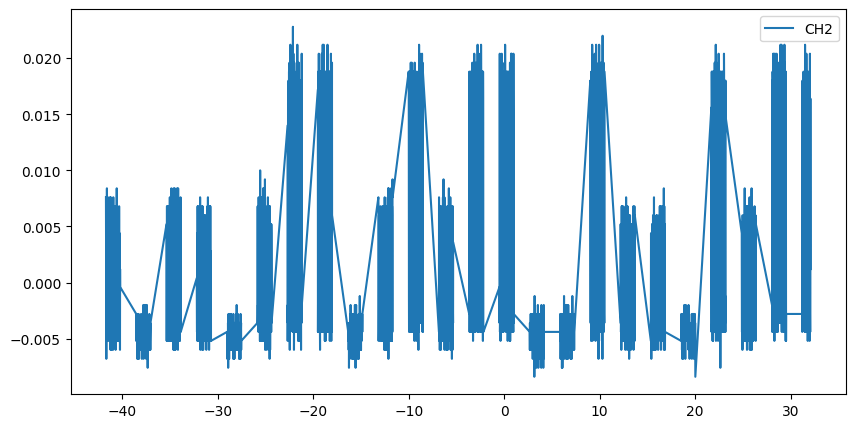

In [43]:
# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(sliced_data[:, 0], sliced_data[:, 2], label='CH2')
plt.legend()
plt.show()

In [44]:
def average_slices(sliced_data):
    result = np.empty((0, 3), float)
    for i in range(0, len(sliced_data), 150):
        result = np.vstack((result, np.mean(sliced_data[i:i+150, :], axis=0)))
    return result

In [45]:
averaged_data = average_slices(sliced_data)

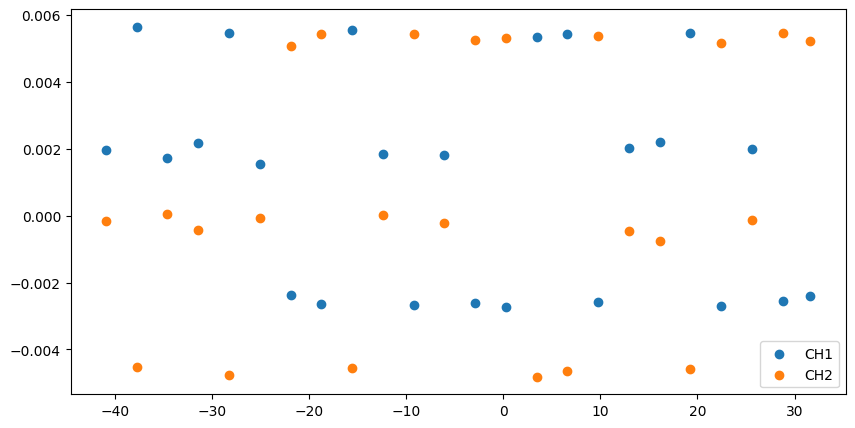

In [46]:
# Plot the data
plt.figure(figsize=(10, 5))
plt.scatter(averaged_data[:, 0], averaged_data[:, 1], label='CH1')
plt.scatter(averaged_data[:, 0], averaged_data[:, 2], label='CH2')
plt.legend()
plt.show()

In [47]:
def discretize(data_np, threshold):
    result = ""
    for i in range(len(data_np)):
        if data_np[i, 1] > threshold:
            result += "1"
        elif data_np[i, 2] > threshold:
            result += "0"
        else:
            result += str(np.random.randint(0, 2))
    return result

In [48]:
discretized_data = discretize(averaged_data, 0.003)

In [49]:
print(discretized_data)

111011001001001101010000


In [50]:
print(discretized_data, "\n", key, "\n", Abases, "\n", Bbases)

111011001001001101010000 
 110110001001001101110100 
 dhhddhdhhhhddhddhdhhdhhd 
 hhdhdddhhdhhdhddhhdhddhd


In [51]:
def find_indices(Abases, Bbases):
    indices = []
    for i in range(len(Abases)):
        if Abases[i] == Bbases[i]:
            indices.append(i)
    return indices
    

In [52]:
indices = find_indices(Abases, Bbases)
final_transmitted = "".join([discretized_data[i] for i in indices])
final_original = "".join([key[i] for i in indices])

In [53]:
print(indices)
print(final_transmitted)
print(final_original)

[1, 4, 6, 7, 8, 10, 12, 13, 14, 15, 16, 19, 20, 22, 23]
110010001101000
110010001101000
